# Analysis #8: Oskar MCA analysis
- Author: Leo BLONDEL

### Description
Generate plots for Figure S4. Performing Multiple Correspondence Analysis (MCA) on Oskar, LOTUS and OSK alignments. 

In [1]:
import get_Infos 
import MCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

from Bio import SeqIO
import colors as Colors

sns.set()
%matplotlib inline

In [13]:
#Number of reduced dimensions 
n = 3

## Defining the colors and other plotting parameters

In [14]:
legend_ordered =  ['Zygentoma',
'Ephemeroptera',
'Plecoptera',
'Orthoptera',
'Phasmatodea',
'Blattodea',
'Thysanoptera',
'Psocoptera',
'Hymenoptera',
'Neuroptera', 
'Coleoptera',
'Trichoptera',
'Lepidoptera',
'Mecoptera',
'Diptera']

colors = Colors.colors()

sns.set_palette(colors.get_pallette())

In [15]:
def build_table(fasta_file):
    handle = SeqIO.parse(fasta_file, 'fasta')
    seqs = [s for s in handle]
    table = {}
    for seq in seqs:
        name =  seq.name
        spec, fam, order = ' '.join(seq.description.split(' ')[1:]).split('|')[:3]
        table[name] = [order, fam, spec]
    return table

def run_mca(fasta_file, n=3):
#     n = 3  # Set the number of dimensions to decompose into

    # Instanciate MCA with the Oskar alignment
    hym = MCA.MCA(fasta_file)
    # Create the W matrix
    W = hym.build_W()
    # Create the X matrix
    X = hym.build_X(W)
    # Compute MCA
    results = hym.MCA(X, n)

    fs, cos, cont = 'Factor score', 'Squared cosines', 'Contributions x 1000'
    points = results.loc[fs].values
    labels = results.columns.values
    return hym, W, X, results, fs, cos, cont, points, labels

def get_meta_from_hym(hym, table):
    # Extracting Families and order from the matrix in the right order
    fam = []
    order = []

    for i in hym.legend:
        if i in table:
            fam.append(table[i][1])
            order.append(table[i][0])
    return fam, order

def make_df(points, order, fam):
    data = pd.DataFrame()
    data['Dim1'] = points[0]
    data['Dim2'] = points[1]
    data['Dim3'] = points[2]
    data['Order'] = order
    data['Family'] = fam
    return data


## Running the MCA analysis on the alignment
See the paper: https://www.pnas.org/content/107/5/1995.short for details and the file MCA.py for implementation

# MCA analysis of Full Lenght Oskar

In [47]:
!trimal \
-in ../Data/01_Oskar_identification/oskar_tracker_results/oskar_filtered.aligned.fasta \
-out ../Data/01_Oskar_identification/oskar_tracker_results/oskar_filtered.aligned.trimmed_0.3.fasta \
-gt 0.3 \
-fasta \
-keepheader

In [48]:
fasta_file = '../Data/01_Oskar_identification/oskar_tracker_results/oskar_filtered.aligned.trimmed_0.3.fasta'

hym, W, X, results, fs, cos, cont, points, labels = run_mca(fasta_file)

table = build_table(fasta_file)

fam, order = get_meta_from_hym(hym, table)

1.2250835423428483 1.2231170748801417


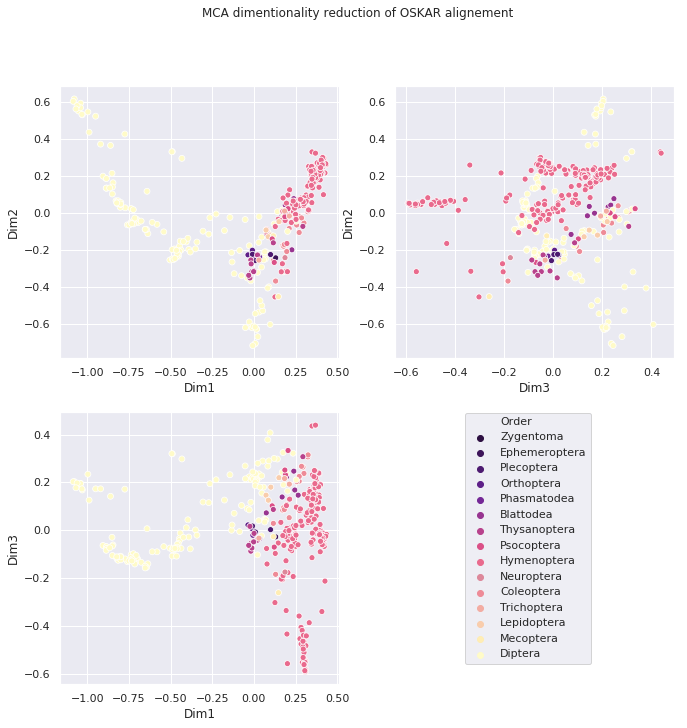

In [49]:
data = make_df(points, order, fam)

fig = plt.figure(figsize=(11,11))
fig.add_subplot(221)
sns.scatterplot(data=data, x='Dim1', y='Dim2', hue='Order', hue_order=colors.legend_order, legend=False)

fig.add_subplot(222)
sns.scatterplot(data=data, x='Dim3', y='Dim2', hue='Order', hue_order=colors.legend_order, legend=False)

fig.add_subplot(223)
sns.scatterplot(data=data, x='Dim1', y='Dim3', hue='Order', hue_order=colors.legend_order)
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper left', borderaxespad=0.)

plt.suptitle('MCA dimentionality reduction of OSKAR alignement')
plt.show()
fig.savefig('../Data/02_Oskar_analyses/2.8/OSKAR_MCA_2D.svg')

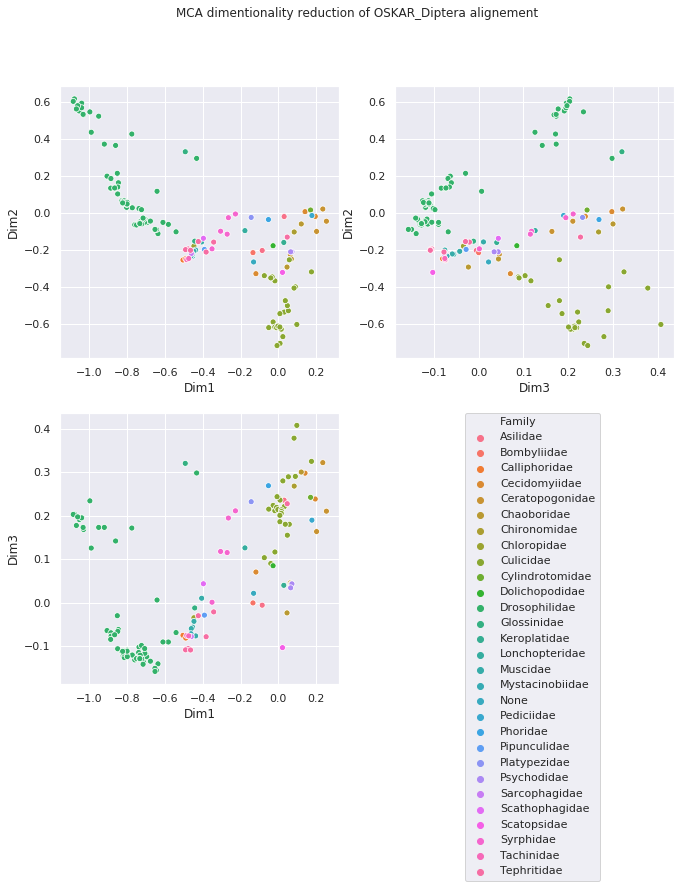

In [50]:
data = make_df(points, order, fam)

fig = plt.figure(figsize=(11,11))
fig.add_subplot(221)
sns.scatterplot(data=data[data['Order'] == 'Diptera'], x='Dim1', y='Dim2', hue='Family', legend=False)

fig.add_subplot(222)
sns.scatterplot(data=data[data['Order'] == 'Diptera'], x='Dim3', y='Dim2', hue='Family', legend=False)

fig.add_subplot(223)
sns.scatterplot(data=data[data['Order'] == 'Diptera'], x='Dim1', y='Dim3', hue='Family')
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper left', borderaxespad=0.)

plt.suptitle('MCA dimentionality reduction of OSKAR_Diptera alignement')
plt.show()
fig.savefig('../Data/02_Oskar_analyses/2.8/OSKAR_Diptera_MCA_2D.svg')

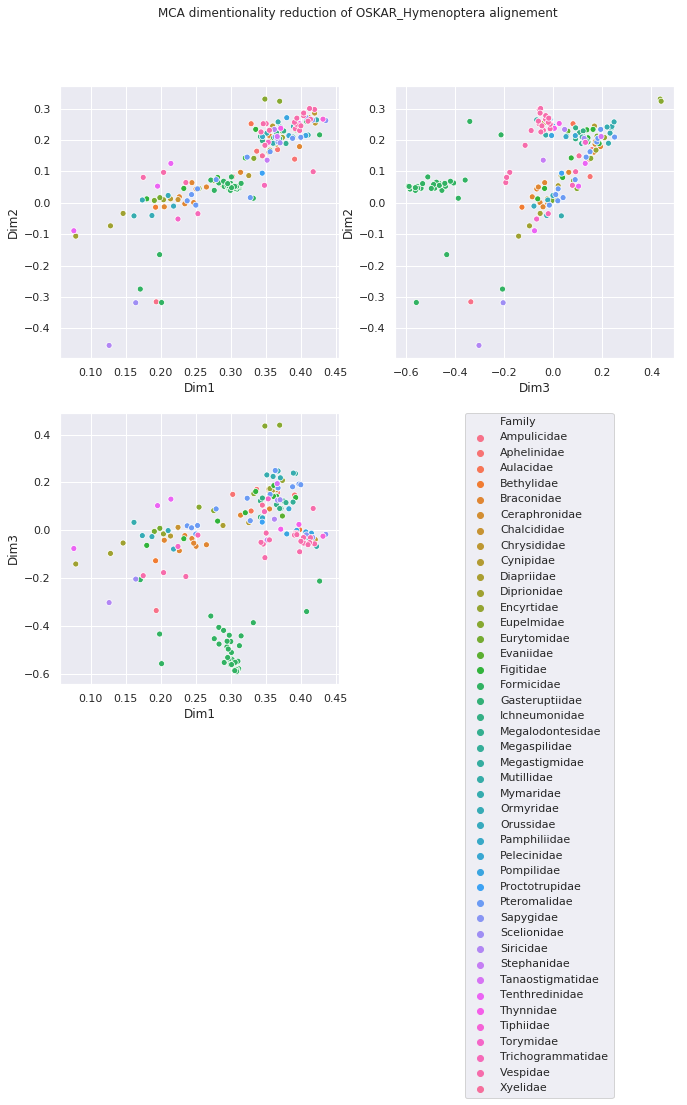

In [51]:
data = make_df(points, order, fam)

fig = plt.figure(figsize=(11,11))
fig.add_subplot(221)
sns.scatterplot(data=data[data['Order'] == 'Hymenoptera'], x='Dim1', y='Dim2', hue='Family', legend=False)

fig.add_subplot(222)
sns.scatterplot(data=data[data['Order'] == 'Hymenoptera'], x='Dim3', y='Dim2', hue='Family', legend=False)

fig.add_subplot(223)
sns.scatterplot(data=data[data['Order'] == 'Hymenoptera'], x='Dim1', y='Dim3', hue='Family')
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper left', borderaxespad=0.)

plt.suptitle('MCA dimentionality reduction of OSKAR_Hymenoptera alignement')
plt.show()
fig.savefig('../Data/02_Oskar_analyses/2.8/OSKAR_Hymenoptera_MCA_2D.svg')

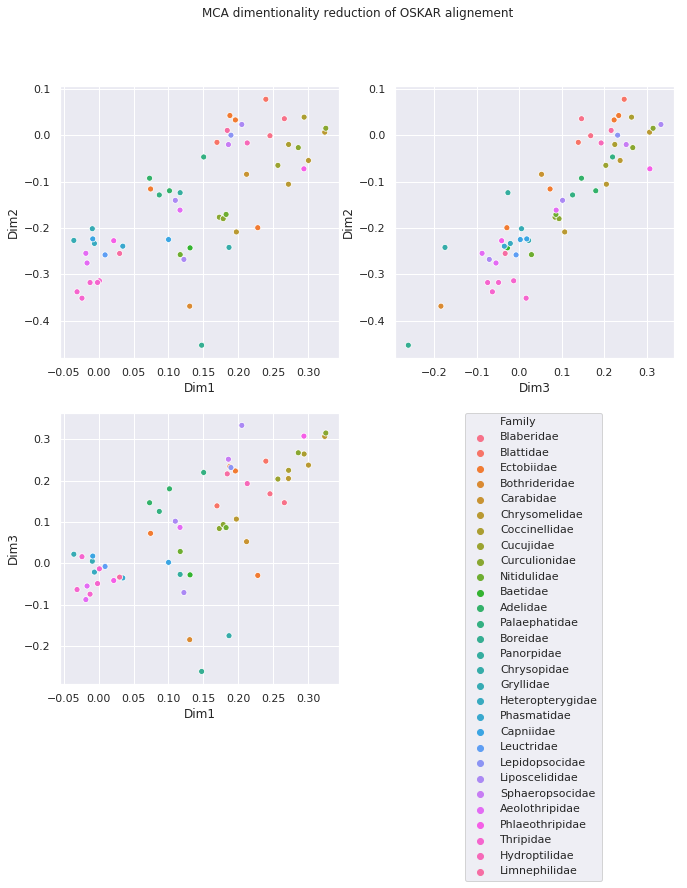

In [52]:
data = make_df(points, order, fam)

fig = plt.figure(figsize=(11,11))
fig.add_subplot(221)
sns.scatterplot(data=data[~data['Order'].isin(['Diptera','Hymenoptera'])], x='Dim1', y='Dim2', hue='Family', legend=False)

fig.add_subplot(222)
sns.scatterplot(data=data[~data['Order'].isin(['Diptera','Hymenoptera'])], x='Dim3', y='Dim2', hue='Family', legend=False)

fig.add_subplot(223)
sns.scatterplot(data=data[~data['Order'].isin(['Diptera','Hymenoptera'])], x='Dim1', y='Dim3', hue='Family')
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper left', borderaxespad=0.)

plt.suptitle('MCA dimentionality reduction of OSKAR alignement')
plt.show()
fig.savefig('../Data/02_Oskar_analyses/2.8/OSKAR_Other_MCA_2D.svg')

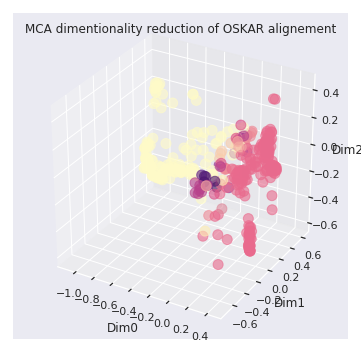

In [53]:
from mpl_toolkits.mplot3d import Axes3D

ccc = [colors.order(x) for x in order]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[0], points[1], points[2], zdir='z', s=100, alpha=0.6, c=ccc, depthshade=True)
ax.set_xlabel('Dim0')
ax.set_ylabel('Dim1')
ax.set_zlabel('Dim2')
plt.title('MCA dimentionality reduction of OSKAR alignement')
fig.savefig('../Data/02_Oskar_analyses/2.8/OSKAR_MCA_3D.svg')

In [12]:
fsd =hym.mca_ben.fs_c(N=n).T
cosd = hym.mca_ben.cos_c(N=n).T
contd = hym.mca_ben.cont_c(N=n).T * 1000

NameError: name 'n' is not defined

In [129]:
fsdall = np.zeros((n,W.shape[1]))
cosall = np.zeros((n,W.shape[1]))
contall = np.zeros((n,W.shape[1]))

In [130]:
back = {}
for i in hym.mapback:
    back[hym.mapback[i]-1] = i
    
for k in range(n):
    for i in range(len(fsd[k])):
        j = back[i]
        fsdall[k][j] = fsd[k][i]
        cosall[k][j] = cosd[k][i]
        contall[k][j] = contd[k][i]

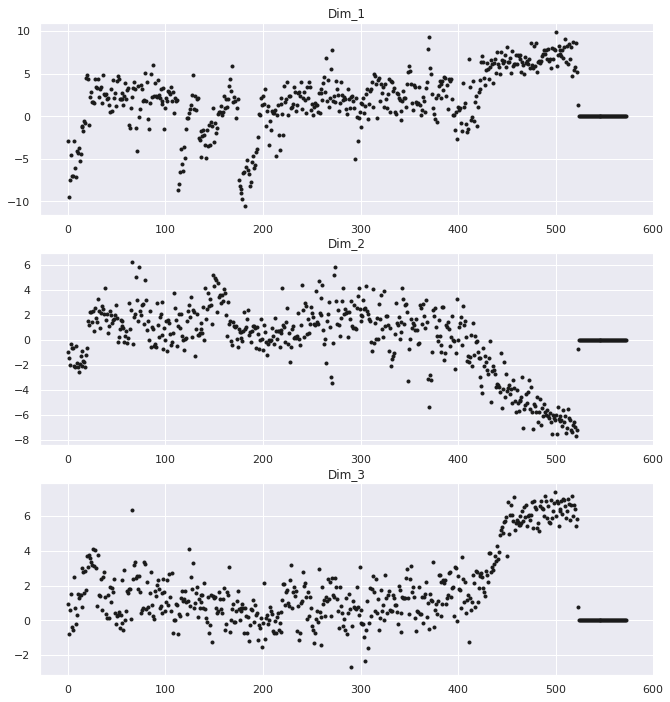

In [131]:
fig = plt.figure(figsize=(11,12))

for k in range(n):
    ax = fig.add_subplot(3,1,k+1)
    positionfs = []
    al = len(hym.alphabet)
    for i in range(int(len(fsdall[k])/al)):
        positionfs.append(np.sum(fsdall[k][i*al:(i+1)*al]))
    plt.plot(list(range(len(positionfs))), positionfs, '.k')
    plt.title("Dim_{}".format(k+1))
plt.show()

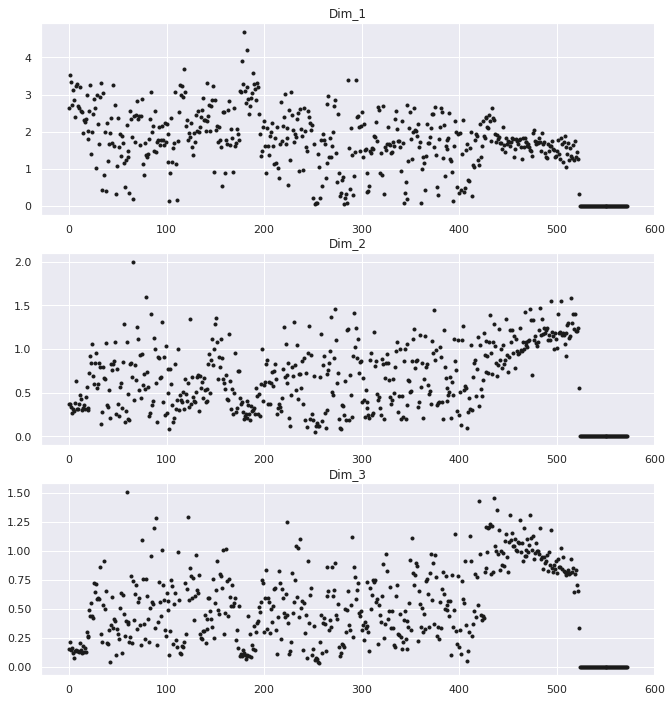

In [132]:
fig = plt.figure(figsize=(11,12))

for k in range(n):
    ax = fig.add_subplot(3,1,k+1)
    positionfs = []
    al = len(hym.alphabet)
    for i in range(int(len(cosall[k])/al)):
        positionfs.append(np.sum(cosall[k][i*al:(i+1)*al]))
    plt.plot(list(range(len(positionfs))), positionfs, '.k')
    plt.title("Dim_{}".format(k+1))
plt.show()

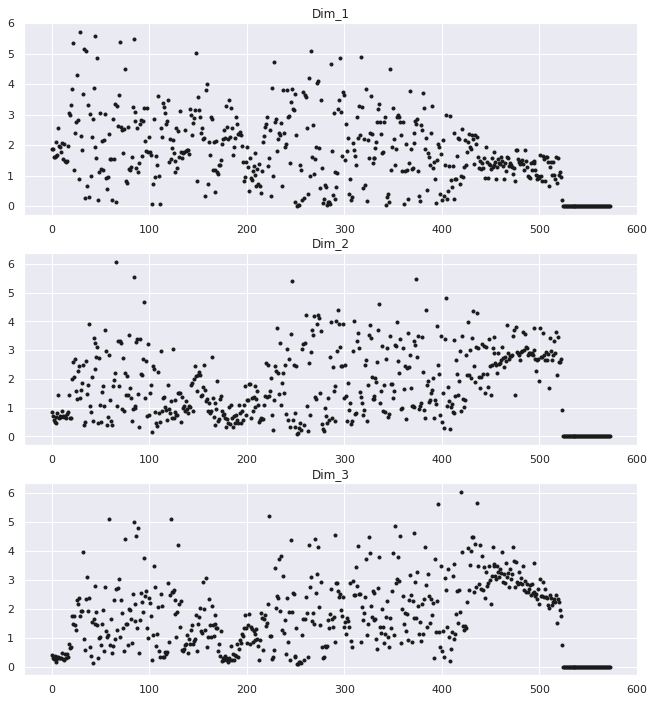

In [133]:
fig = plt.figure(figsize=(11,12))

for k in range(n):
    ax = fig.add_subplot(3,1,k+1)
    positionfs = []
    al = len(hym.alphabet)
    for i in range(int(len(contall[k])/al)):
        positionfs.append(np.sum(contall[k][i*al:(i+1)*al]))
    plt.plot(list(range(len(positionfs))), positionfs, '.k')
    plt.title("Dim_{}".format(k+1))
plt.show()

# Doing Lotus Domain

In [54]:
!trimal \
-in ../Data/01_Oskar_identification/oskar_tracker_results/oskar_filtered.aligned.LOTUS_domain.fasta \
-out ../Data/01_Oskar_identification/oskar_tracker_results/oskar_filtered.aligned.LOTUS_domain.trimmed_0.3.fasta \
-gt 0.3 \
-fasta \
-keepheader

In [55]:
fasta_file = '../Data/01_Oskar_identification/oskar_tracker_results/oskar_filtered.aligned.LOTUS_domain.trimmed_0.3.fasta'

hym, W, X, results, fs, cos, cont, points, labels = run_mca(fasta_file)

table = build_table(fasta_file)

fam, order = get_meta_from_hym(hym, table)

1.5070414289784122 1.5052810051171448


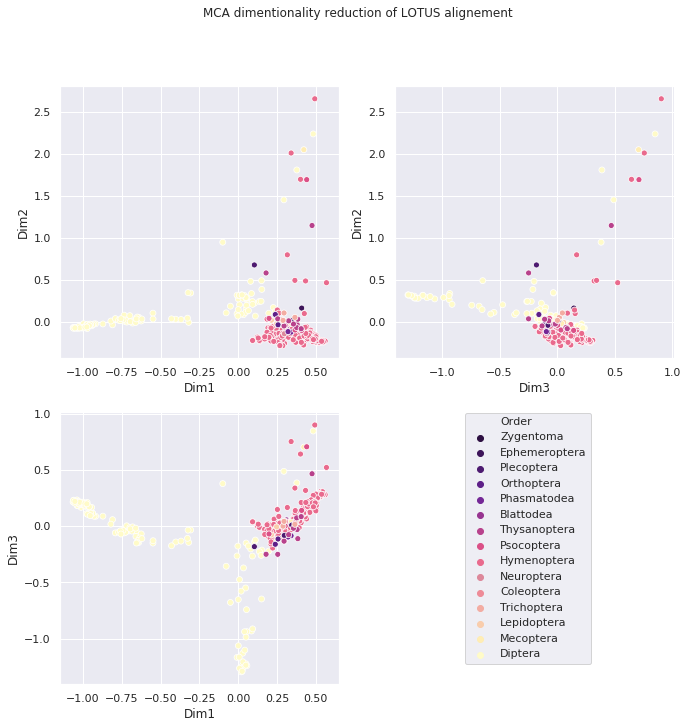

In [56]:
data = make_df(points, order, fam)

fig = plt.figure(figsize=(11,11))
fig.add_subplot(221)
sns.scatterplot(data=data, x='Dim1', y='Dim2', hue='Order', hue_order=colors.legend_order, legend=False)

fig.add_subplot(222)
sns.scatterplot(data=data, x='Dim3', y='Dim2', hue='Order', hue_order=colors.legend_order, legend=False)

fig.add_subplot(223)
sns.scatterplot(data=data, x='Dim1', y='Dim3', hue='Order', hue_order=colors.legend_order)
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper left', borderaxespad=0.)

plt.suptitle('MCA dimentionality reduction of LOTUS alignement')
plt.show()
fig.savefig('../Data/02_Oskar_analyses/2.8/LOTUS_MCA_2D.svg')

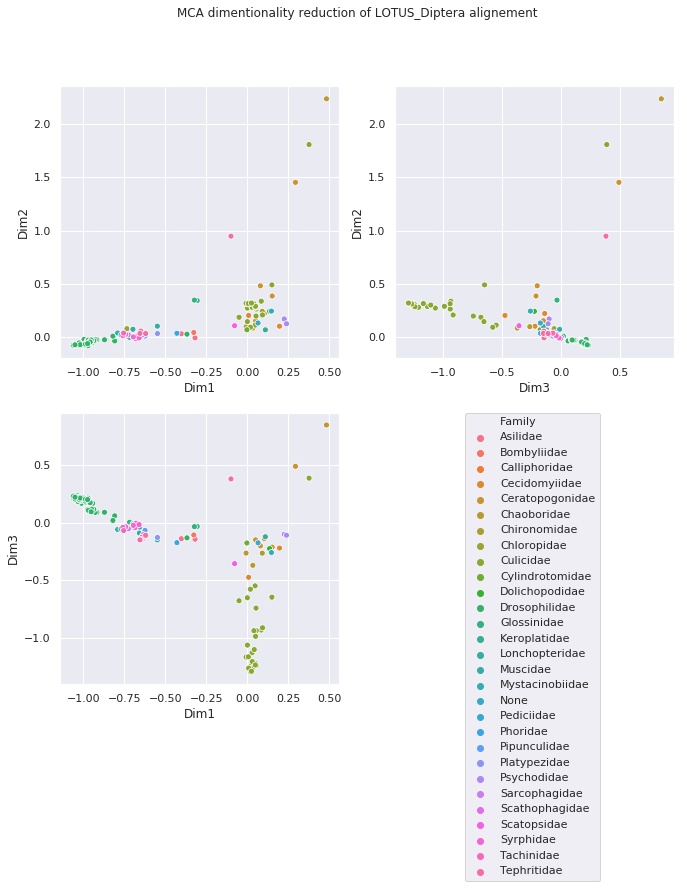

In [57]:
data = make_df(points, order, fam)

fig = plt.figure(figsize=(11,11))
fig.add_subplot(221)
sns.scatterplot(data=data[data['Order'] == 'Diptera'], x='Dim1', y='Dim2', hue='Family', legend=False)

fig.add_subplot(222)
sns.scatterplot(data=data[data['Order'] == 'Diptera'], x='Dim3', y='Dim2', hue='Family', legend=False)

fig.add_subplot(223)
sns.scatterplot(data=data[data['Order'] == 'Diptera'], x='Dim1', y='Dim3', hue='Family')
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper left', borderaxespad=0.)

plt.suptitle('MCA dimentionality reduction of LOTUS_Diptera alignement')
plt.show()
fig.savefig('../Data/02_Oskar_analyses/2.8/LOTUS_Diptera_MCA_2D.svg')

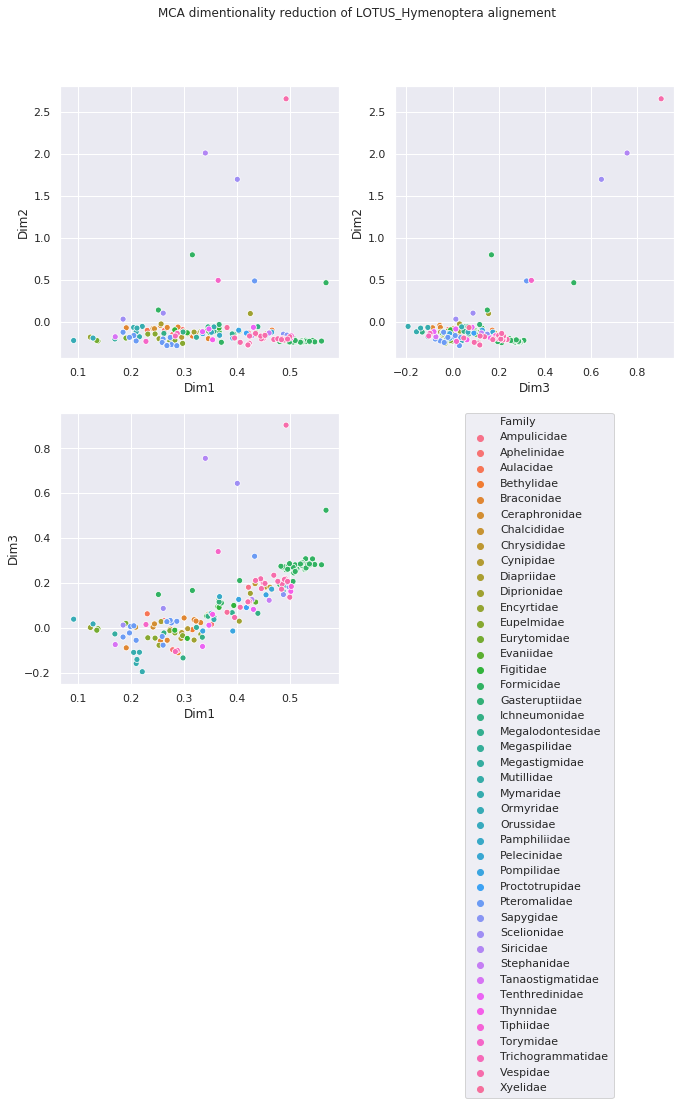

In [58]:
data = make_df(points, order, fam)

fig = plt.figure(figsize=(11,11))
fig.add_subplot(221)
sns.scatterplot(data=data[data['Order'] == 'Hymenoptera'], x='Dim1', y='Dim2', hue='Family', legend=False)

fig.add_subplot(222)
sns.scatterplot(data=data[data['Order'] == 'Hymenoptera'], x='Dim3', y='Dim2', hue='Family', legend=False)

fig.add_subplot(223)
sns.scatterplot(data=data[data['Order'] == 'Hymenoptera'], x='Dim1', y='Dim3', hue='Family')
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper left', borderaxespad=0.)

plt.suptitle('MCA dimentionality reduction of LOTUS_Hymenoptera alignement')
plt.show()
fig.savefig('../Data/02_Oskar_analyses/2.8/LOTUS_Hymenoptera_MCA_2D.svg')

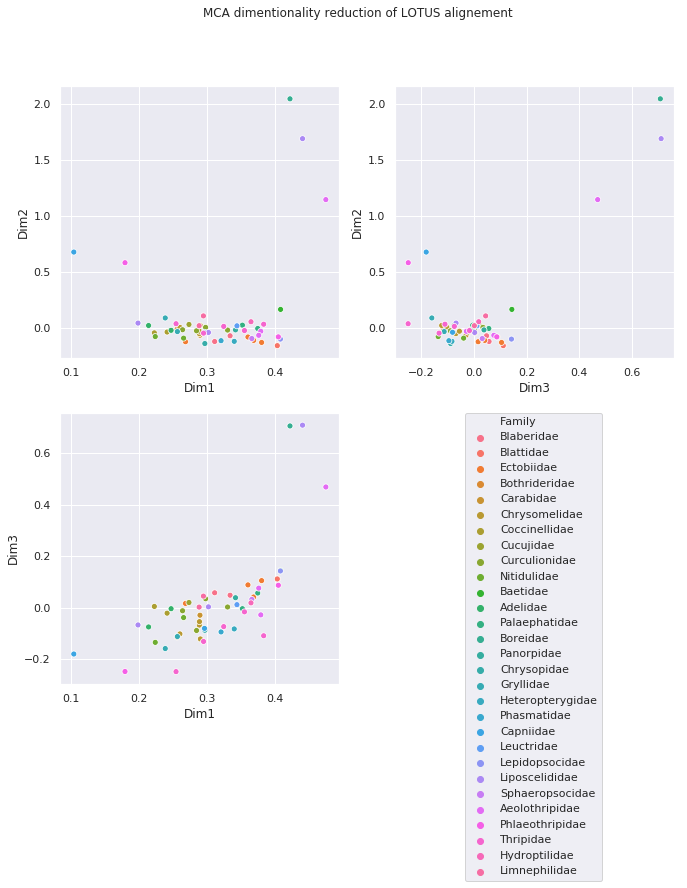

In [59]:
data = make_df(points, order, fam)

fig = plt.figure(figsize=(11,11))
fig.add_subplot(221)
sns.scatterplot(data=data[~data['Order'].isin(['Diptera','Hymenoptera'])], x='Dim1', y='Dim2', hue='Family', legend=False)

fig.add_subplot(222)
sns.scatterplot(data=data[~data['Order'].isin(['Diptera','Hymenoptera'])], x='Dim3', y='Dim2', hue='Family', legend=False)

fig.add_subplot(223)
sns.scatterplot(data=data[~data['Order'].isin(['Diptera','Hymenoptera'])], x='Dim1', y='Dim3', hue='Family')
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper left', borderaxespad=0.)

plt.suptitle('MCA dimentionality reduction of LOTUS alignement')
plt.show()
fig.savefig('../Data/02_Oskar_analyses/2.8/LOTUS_Other_MCA_2D.svg')

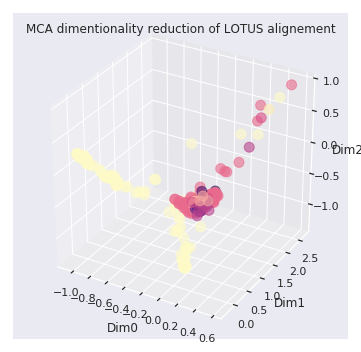

In [60]:
ccc = [colors.order(x) for x in order]
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[0], points[1], points[2], zdir='z', s=100, alpha=0.6, c=ccc, depthshade=True)
ax.set_xlabel('Dim0')
ax.set_ylabel('Dim1')
ax.set_zlabel('Dim2')
plt.title('MCA dimentionality reduction of LOTUS alignement')
fig.savefig('../Data/02_Oskar_analyses/2.8/LOTUS_MCA_3D.svg')

In [137]:
fsd =hym.mca_ben.fs_c(N=n).T
cosd = hym.mca_ben.cos_c(N=n).T
contd = hym.mca_ben.cont_c(N=n).T * 1000

In [138]:
fsdall = np.zeros((n,W.shape[1]))
cosall = np.zeros((n,W.shape[1]))
contall = np.zeros((n,W.shape[1]))

In [139]:
back = {}
for i in hym.mapback:
    back[hym.mapback[i]-1] = i
    
for k in range(n):
    for i in range(len(fsd[k])):
        j = back[i]
        fsdall[k][j] = fsd[k][i]
        cosall[k][j] = cosd[k][i]
        contall[k][j] = contd[k][i]

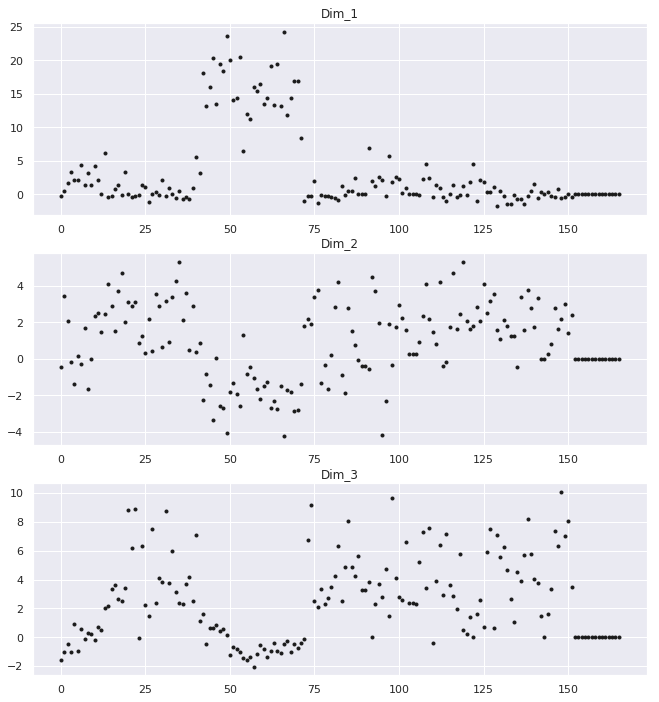

In [140]:
fig = plt.figure(figsize=(11,12))

for k in range(n):
    ax = fig.add_subplot(3,1,k+1)
    positionfs = []
    al = len(hym.alphabet)
    for i in range(int(len(fsdall[k])/al)):
        positionfs.append(np.sum(fsdall[k][i*al:(i+1)*al]))
    plt.plot(list(range(len(positionfs))), positionfs, '.k')
    plt.title("Dim_{}".format(k+1))
plt.show()

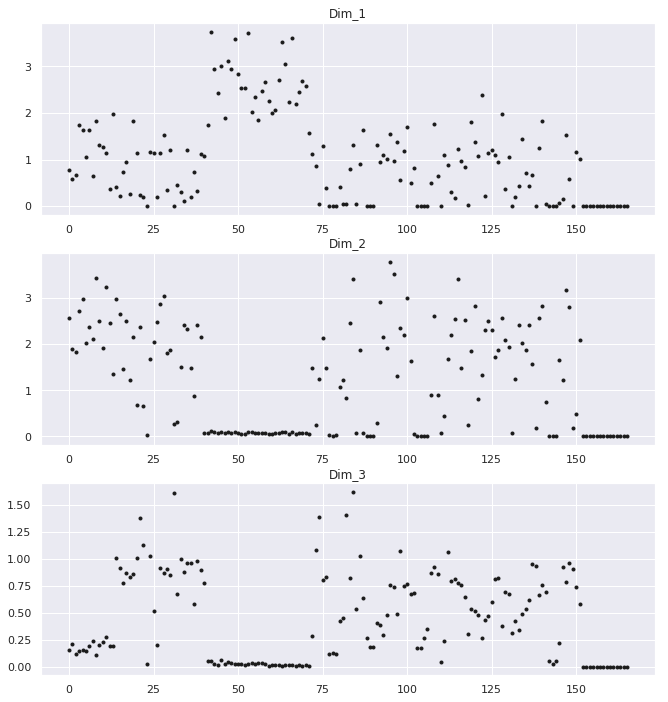

In [141]:
fig = plt.figure(figsize=(11,12))

for k in range(n):
    ax = fig.add_subplot(3,1,k+1)
    positionfs = []
    al = len(hym.alphabet)
    for i in range(int(len(cosall[k])/al)):
        positionfs.append(np.sum(cosall[k][i*al:(i+1)*al]))
    plt.plot(list(range(len(positionfs))), positionfs, '.k')
    plt.title("Dim_{}".format(k+1))
plt.show()

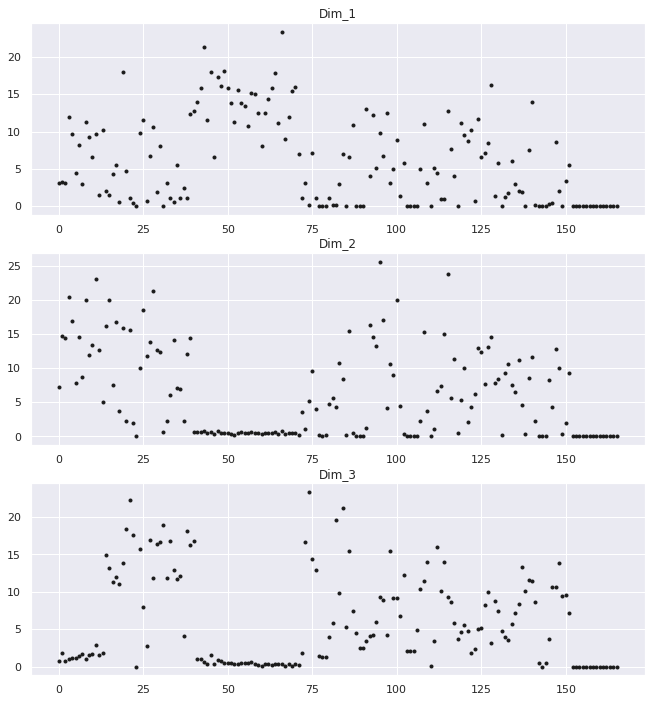

In [142]:
fig = plt.figure(figsize=(11,12))

for k in range(n):
    ax = fig.add_subplot(3,1,k+1)
    positionfs = []
    al = len(hym.alphabet)
    for i in range(int(len(contall[k])/al)):
        positionfs.append(np.sum(contall[k][i*al:(i+1)*al]))
    plt.plot(list(range(len(positionfs))), positionfs, '.k')
    plt.title("Dim_{}".format(k+1))
plt.show()

# Now analysis of OSK

In [61]:
!trimal \
-in ../Data/01_Oskar_identification/oskar_tracker_results/oskar_filtered.aligned.OSK_domain.fasta \
-out ../Data/01_Oskar_identification/oskar_tracker_results/oskar_filtered.aligned.OSK_domain.trimmed_0.3.fasta \
-gt 0.3 \
-fasta \
-keepheader

In [62]:
fasta_file = '../Data/01_Oskar_identification/oskar_tracker_results/oskar_filtered.aligned.OSK_domain.trimmed_0.3.fasta'

hym, W, X, results, fs, cos, cont, points, labels = run_mca(fasta_file)

table = build_table(fasta_file)

fam, order = get_meta_from_hym(hym, table)

1.372738074677885 1.3703603290588402


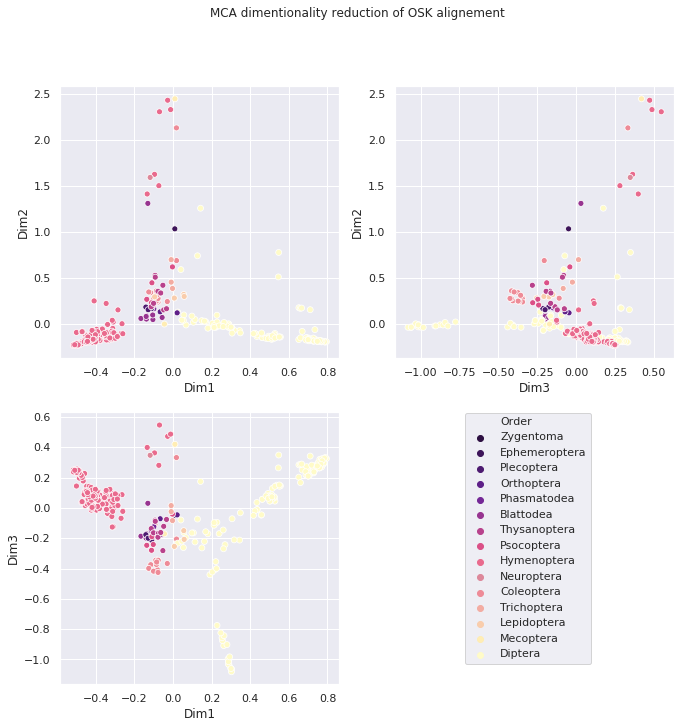

In [63]:
data = make_df(points, order, fam)

fig = plt.figure(figsize=(11,11))
fig.add_subplot(221)
sns.scatterplot(data=data, x='Dim1', y='Dim2', hue='Order', hue_order=colors.legend_order, legend=False)

fig.add_subplot(222)
sns.scatterplot(data=data, x='Dim3', y='Dim2', hue='Order', hue_order=colors.legend_order, legend=False)

fig.add_subplot(223)
sns.scatterplot(data=data, x='Dim1', y='Dim3', hue='Order', hue_order=colors.legend_order)
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper left', borderaxespad=0.)

plt.suptitle('MCA dimentionality reduction of OSK alignement')
plt.show()
fig.savefig('../Data/02_Oskar_analyses/2.8/OSK_MCA_2D.svg')

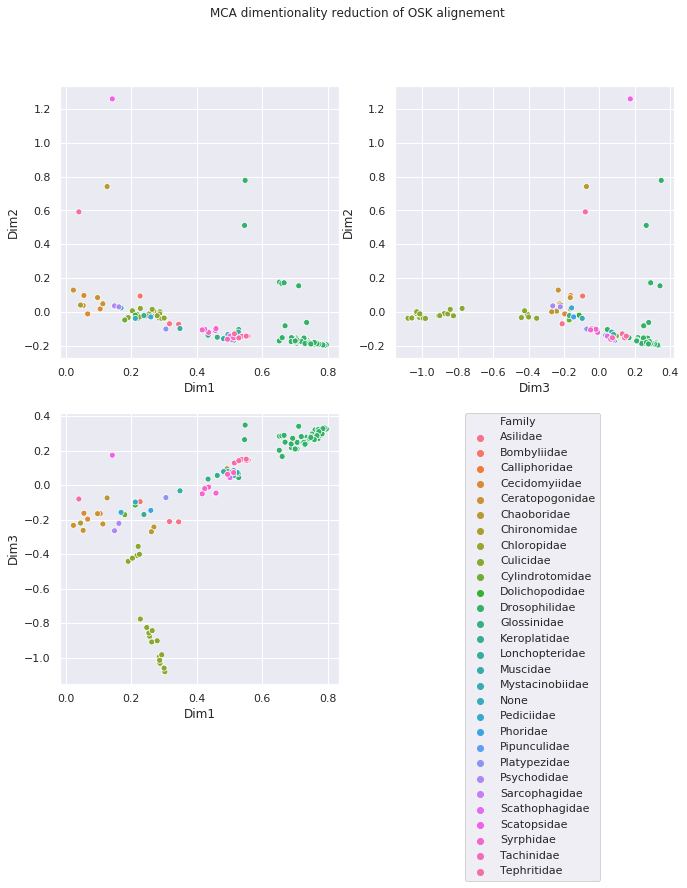

In [64]:
data = make_df(points, order, fam)

fig = plt.figure(figsize=(11,11))
fig.add_subplot(221)
sns.scatterplot(data=data[data['Order'] == 'Diptera'], x='Dim1', y='Dim2', hue='Family', legend=False)

fig.add_subplot(222)
sns.scatterplot(data=data[data['Order'] == 'Diptera'], x='Dim3', y='Dim2', hue='Family', legend=False)

fig.add_subplot(223)
sns.scatterplot(data=data[data['Order'] == 'Diptera'], x='Dim1', y='Dim3', hue='Family')
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper left', borderaxespad=0.)

plt.suptitle('MCA dimentionality reduction of OSK alignement')
plt.show()
fig.savefig('../Data/02_Oskar_analyses/2.8/OSK_Diptera_MCA_2D.svg')

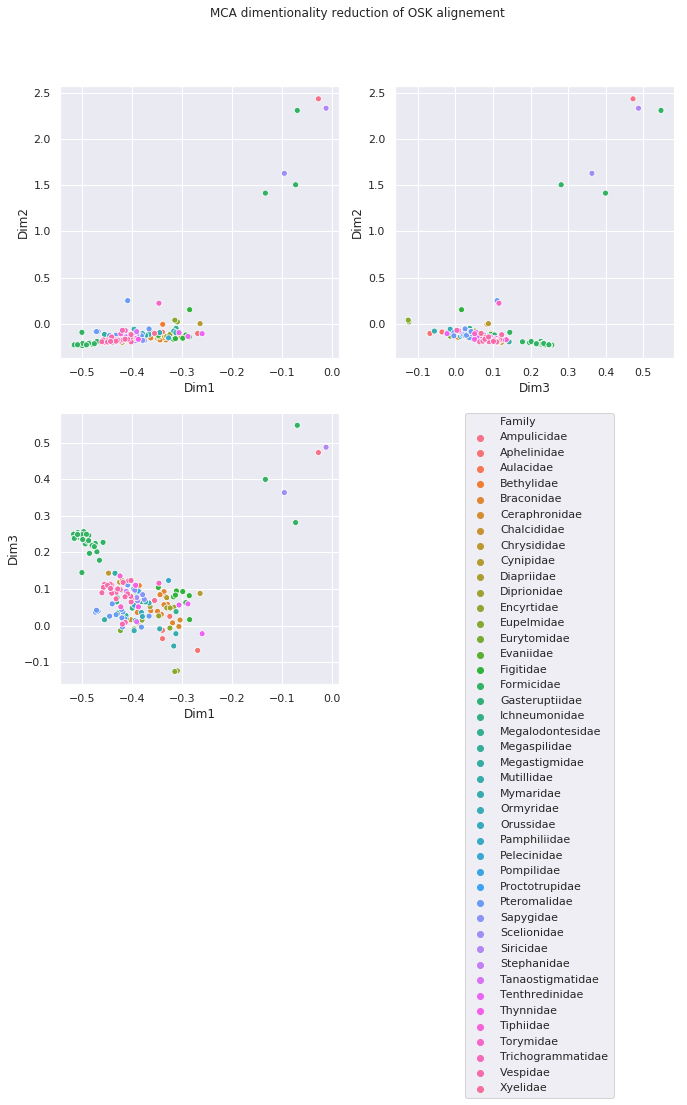

In [65]:
data = make_df(points, order, fam)

fig = plt.figure(figsize=(11,11))
fig.add_subplot(221)
sns.scatterplot(data=data[data['Order'] == 'Hymenoptera'], x='Dim1', y='Dim2', hue='Family', legend=False)

fig.add_subplot(222)
sns.scatterplot(data=data[data['Order'] == 'Hymenoptera'], x='Dim3', y='Dim2', hue='Family', legend=False)

fig.add_subplot(223)
sns.scatterplot(data=data[data['Order'] == 'Hymenoptera'], x='Dim1', y='Dim3', hue='Family')
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper left', borderaxespad=0.)

plt.suptitle('MCA dimentionality reduction of OSK alignement')
plt.show()
fig.savefig('../Data/02_Oskar_analyses/2.8/OSK_Hymenoptera_MCA_2D.svg')

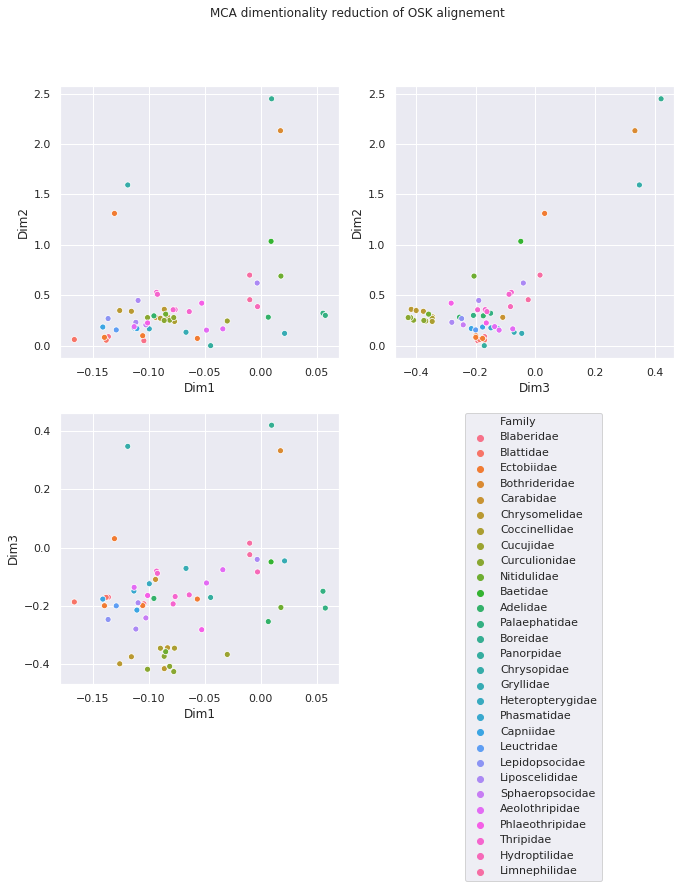

In [66]:
data = make_df(points, order, fam)

fig = plt.figure(figsize=(11,11))
fig.add_subplot(221)
sns.scatterplot(data=data[~data['Order'].isin(['Diptera','Hymenoptera'])], x='Dim1', y='Dim2', hue='Family', legend=False)

fig.add_subplot(222)
sns.scatterplot(data=data[~data['Order'].isin(['Diptera','Hymenoptera'])], x='Dim3', y='Dim2', hue='Family', legend=False)

fig.add_subplot(223)
sns.scatterplot(data=data[~data['Order'].isin(['Diptera','Hymenoptera'])], x='Dim1', y='Dim3', hue='Family')
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper left', borderaxespad=0.)

plt.suptitle('MCA dimentionality reduction of OSK alignement')
plt.show()
fig.savefig('../Data/02_Oskar_analyses/2.8/OSK_Other_MCA_2D.svg')

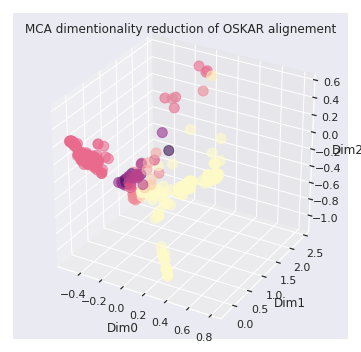

In [67]:
ccc = [colors.order(x) for x in order]
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[0], points[1], points[2], zdir='z', s=100, alpha=0.6, c=ccc, depthshade=True)
ax.set_xlabel('Dim0')
ax.set_ylabel('Dim1')
ax.set_zlabel('Dim2')
plt.title('MCA dimentionality reduction of OSKAR alignement')
fig.savefig('../Data/02_Oskar_analyses/2.8/OSKAR_MCA_3D.svg')

In [146]:
fsd =hym.mca_ben.fs_c(N=n).T
cosd = hym.mca_ben.cos_c(N=n).T
contd = hym.mca_ben.cont_c(N=n).T * 1000

In [147]:
fsdall = np.zeros((n,W.shape[1]))
cosall = np.zeros((n,W.shape[1]))
contall = np.zeros((n,W.shape[1]))

In [148]:
back = {}
for i in hym.mapback:
    back[hym.mapback[i]-1] = i
    
for k in range(n):
    for i in range(len(fsd[k])):
        j = back[i]
        fsdall[k][j] = fsd[k][i]
        cosall[k][j] = cosd[k][i]
        contall[k][j] = contd[k][i]

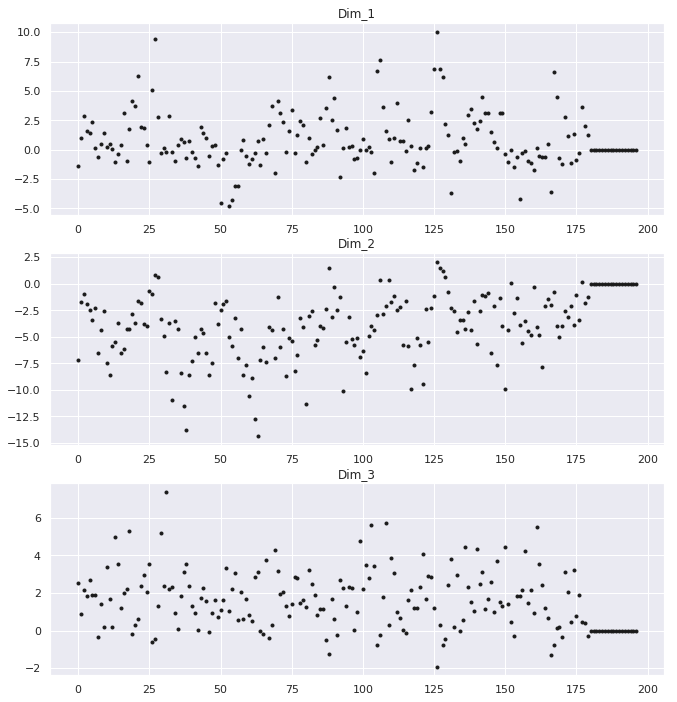

In [149]:
fig = plt.figure(figsize=(11,12))

for k in range(n):
    ax = fig.add_subplot(3,1,k+1)
    positionfs = []
    al = len(hym.alphabet)
    for i in range(int(len(fsdall[k])/al)):
        positionfs.append(np.sum(fsdall[k][i*al:(i+1)*al]))
    plt.plot(list(range(len(positionfs))), positionfs, '.k')
    plt.title("Dim_{}".format(k+1))
plt.show()

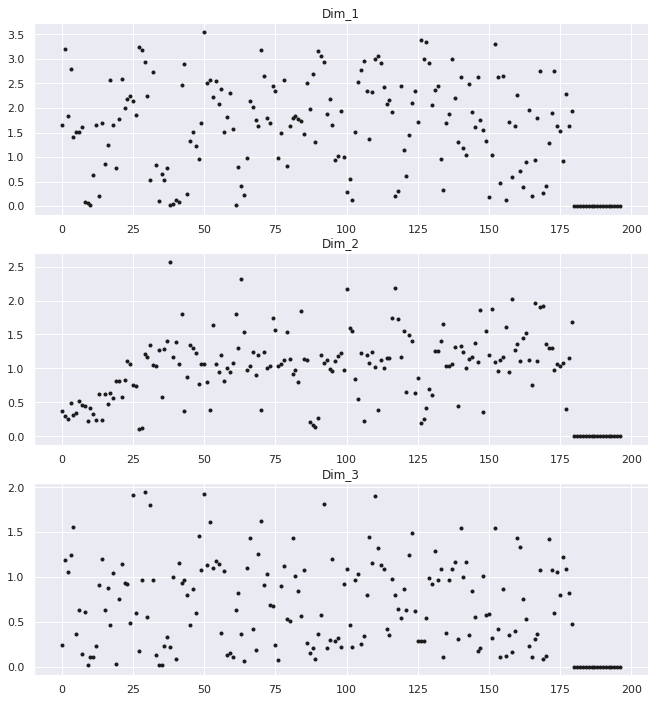

In [150]:
fig = plt.figure(figsize=(11,12))

for k in range(n):
    ax = fig.add_subplot(3,1,k+1)
    positionfs = []
    al = len(hym.alphabet)
    for i in range(int(len(cosall[k])/al)):
        positionfs.append(np.sum(cosall[k][i*al:(i+1)*al]))
    plt.plot(list(range(len(positionfs))), positionfs, '.k')
    plt.title("Dim_{}".format(k+1))
plt.show()

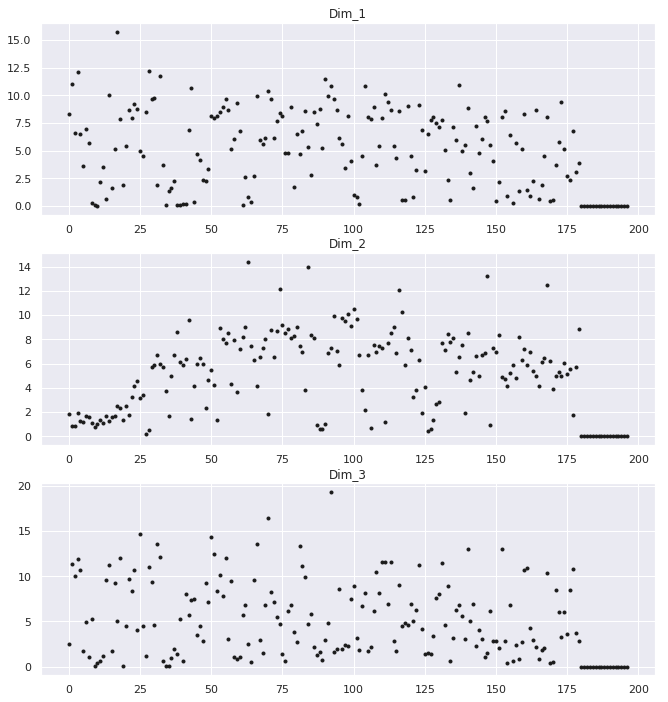

In [151]:
fig = plt.figure(figsize=(11,12))

for k in range(n):
    ax = fig.add_subplot(3,1,k+1)
    positionfs = []
    al = len(hym.alphabet)
    for i in range(int(len(contall[k])/al)):
        positionfs.append(np.sum(contall[k][i*al:(i+1)*al]))
    plt.plot(list(range(len(positionfs))), positionfs, '.k')
    plt.title("Dim_{}".format(k+1))
plt.show()